## Importing Libraries

In [2]:
# Importing all the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\H P\Desktop\Real_Estate_Investment_Advisor_Using_ML_Streamlit\data\india_housing_prices.csv")
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


## Data Wrangling

In [4]:
# checking the first 5 rows of the dataset
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


#### This function will show us the first 5 rows with all columns inclusive.

In [5]:
# Checking the last 5 rows of the dataset
df.tail()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move
249999,250000,Haryana,Gurgaon,Locality_268,Independent House,3,4313,199.69,0.05,1990,...,35,10,6,Medium,No,No,"Gym, Garden",South,Owner,Under_Construction


#### This function will show us the last 5 rows with all columns inclusive.

In [6]:
# checking the shape of the dataset
df.shape

(250000, 23)

#### The dataset has around 2,50,000 Rows and 23 Columns respectively.

In [7]:
# checking the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

#### This function will show us the information present in the dataset on the basis of Column Names, Non Null count's and Dtype (Data types).

In [8]:
# checking the statistical measures of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,250000.0,125000.500000,72168.927986,1.0,62500.75,125000.50,187500.25,250000.00
BHK,250000.0,2.999396,1.415521,1.0,2.00,3.00,4.00,5.00
Size_in_SqFt,250000.0,2749.813216,1300.606954,500.0,1623.00,2747.00,3874.00,5000.00
Price_in_Lakhs,250000.0,254.586854,141.349921,10.0,132.55,253.87,376.88,500.00
Price_per_SqFt,250000.0,0.130597,0.130747,0.0,0.05,0.09,0.16,0.99
Year_Built,250000.0,2006.520012,9.808575,1990.0,1998.00,2007.00,2015.00,2023.00
Floor_No,250000.0,14.966800,8.948047,0.0,7.00,15.00,23.00,30.00
Total_Floors,250000.0,15.503004,8.671618,1.0,8.00,15.00,23.00,30.00
Age_of_Property,250000.0,18.479988,9.808575,2.0,10.00,18.00,27.00,35.00
Nearby_Schools,250000.0,5.499860,2.878639,1.0,3.00,5.00,8.00,10.00


#### The output shows the Statistical Descriptions of all the Numeric values in the dataset.

In [9]:
# Checking on the missing values in the dataset
df.isna().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

#### there is no missing values or null counts in the dataset, so it's a perfect call from the null counts point of view.

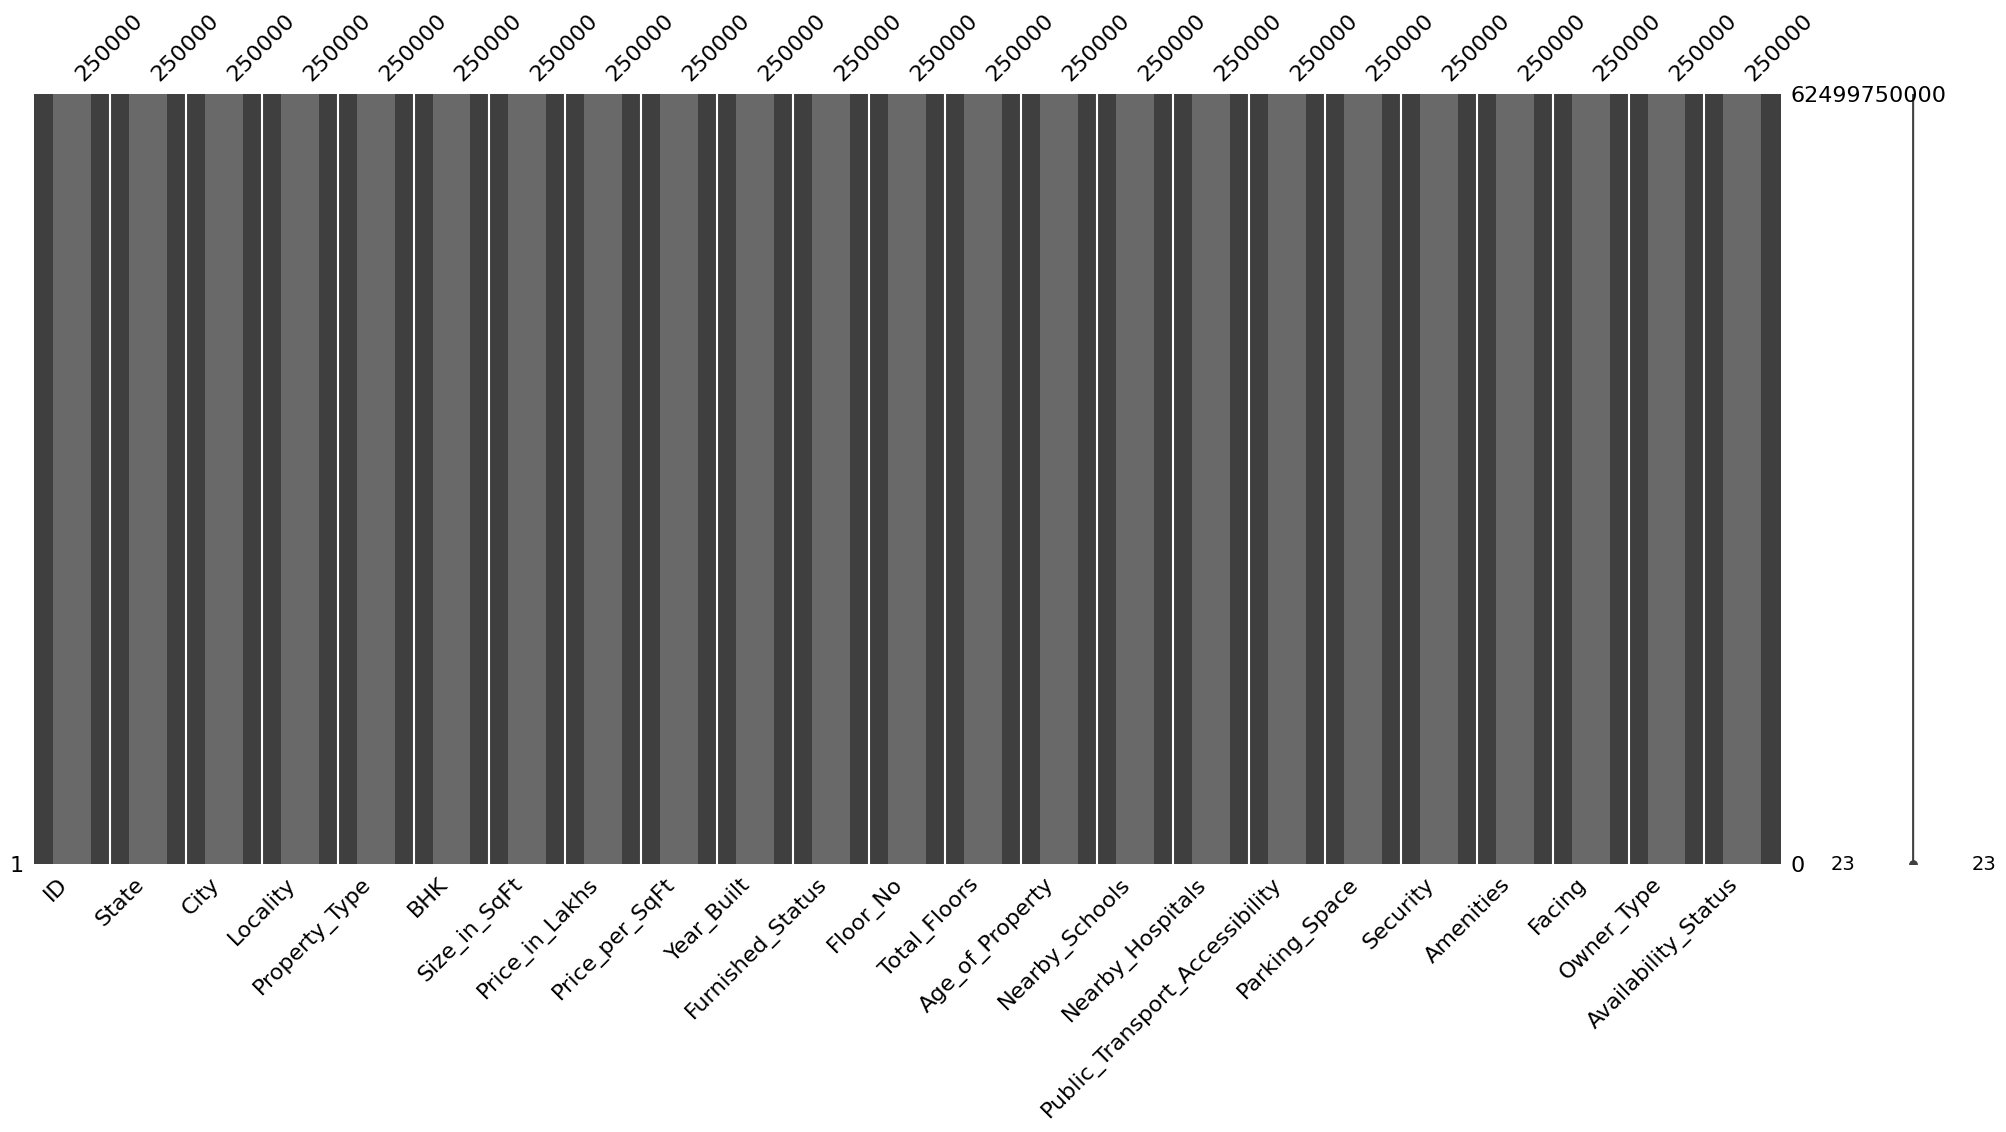

In [10]:
# Visualizing the missing values using missingno library
import missingno as msno
msno.matrix(df)
msno.bar(df)
plt.show()

#### The chart is clearly showing there are no null values present in the dataset.

In [11]:
# Checking for the duplicate values in the dataset
print(df.duplicated().sum())

0


#### So, there are no duplicated rows, which indicates the dataset is ready for the analysis purpose.

In [12]:
# Removing the extra spaces from the column names if present
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

#### I just removed the extra space from the columns if they are present.

In [13]:
# Checking the column names and their data types
pd.DataFrame({'Column Name': df.columns, 'Data Type': df.dtypes}).reset_index(drop=True)

,Column Name,Data Type
0,ID,int64
1,State,object
2,City,object
3,Locality,object
4,Property_Type,object
5,BHK,int64
6,Size_in_SqFt,int64
7,Price_in_Lakhs,float64
8,Price_per_SqFt,float64
9,Year_Built,int64


In [31]:
# checking over the columns with float data type
float_cols = df.select_dtypes(include=['float64']).columns
pd.DataFrame(float_cols, columns=['Float Columns'])

,Float Columns
0,Price_in_Lakhs
1,Price_per_SqFt


In [30]:
# checking over the columns with categorical data types
cat_cols = df.select_dtypes(include=['object']).columns
pd.DataFrame(cat_cols, columns=['Categorical Columns'])


,Categorical Columns
0,State
1,City
2,Locality
3,Property_Type
4,Furnished_Status
5,Public_Transport_Accessibility
6,Parking_Space
7,Security
8,Amenities
9,Facing


In [32]:
# checking over the columns with integer data types
int_cols = df.select_dtypes(include=['int64']).columns
pd.DataFrame(int_cols, columns=['Integer Columns'])


,Integer Columns
0,ID
1,BHK
2,Size_in_SqFt
3,Year_Built
4,Floor_No
5,Total_Floors
6,Age_of_Property
7,Nearby_Schools
8,Nearby_Hospitals
